In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, SimpleRNN, GRU, LSTM, Bidirectional, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("tcc_ceds_music.csv")
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [35]:
#remove unneccessary data from dataset
df = df[['lyrics', 'genre']]
df

,lyrics,genre
0,hold time feel break feel untrue convince spea...,pop
1,believe drop rain fall grow believe darkest ni...,pop
2,sweetheart send letter goodbye secret feel bet...,pop
3,kiss lips want stroll charm mambo chacha merin...,pop
4,till darling till matter know till dream live ...,pop
...,...,...
28367,cause fuck leave scar tick tock clock come kno...,hip hop
28368,minks things chain ring braclets yap fame come...,hip hop
28369,get ban get ban stick crack relax plan attack ...,hip hop
28370,check check yeah yeah hear thing call switch g...,hip hop


In [36]:
#train test split
# Splitting the data into features (X) and target (y)
X = df.drop(columns=['genre'])
y = df['genre']

# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Assuming y_train and y_test are your target variables
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

In [38]:
#reference: https://www.tensorflow.org/text/guide/word_embeddings
# Vocabulary size and number of words in a sequence.
vocab_size = 10000
sequence_length = 100

vectorize_layer = TextVectorization(
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
vectorize_layer.adapt(X_train)

In [39]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(16, activation='relu'),
  Dense(7)
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks = [callback])

Epoch 1/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2479 - loss: 0.4555 - val_accuracy: 0.2574 - val_loss: 0.3837
Epoch 2/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2656 - loss: 0.3789 - val_accuracy: 0.2789 - val_loss: 0.3749
Epoch 3/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3024 - loss: 0.3671 - val_accuracy: 0.3135 - val_loss: 0.3674
Epoch 4/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3639 - loss: 0.3529 - val_accuracy: 0.3339 - val_loss: 0.3617
Epoch 5/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4115 - loss: 0.3419 - val_accuracy: 0.3556 - val_loss: 0.3578
Epoch 6/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4563 - loss: 0.3273 - val_accuracy: 0.3649 - val_loss: 0.3561
Epoch 7/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4826 - loss: 0.3153 - val_accuracy: 0.3824 - val_loss: 0.3560
Epoch 8/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5184 - loss: 0.3014 - val_accuracy: 0.

In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,175 (1.84 MB)

 Trainable params: 160,391 (626.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,784 (1.22 MB)

178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


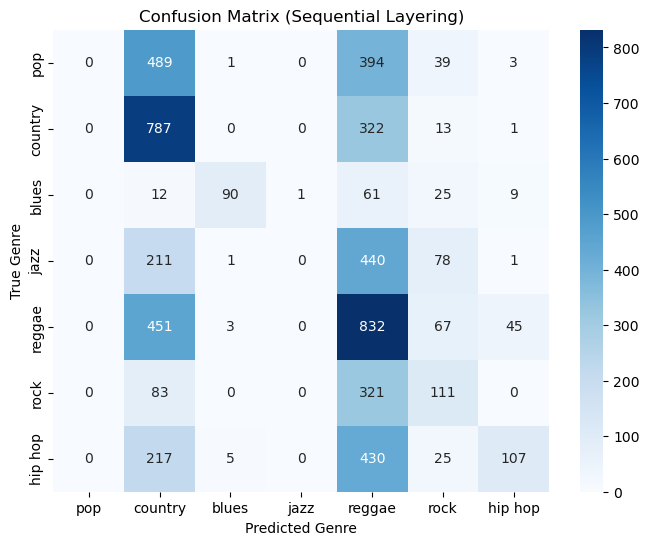

In [49]:
labels = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix (Sequential Layering)")
plt.show()

Trying RNN:

In [66]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GRU(32, return_sequences=True),
  SimpleRNN(16),
  Dense(7)
])

In [67]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks= [callback])

Epoch 1/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.2240 - loss: 0.4347 - val_accuracy: 0.2463 - val_loss: 0.3878
Epoch 2/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.2580 - loss: 0.3836 - val_accuracy: 0.2592 - val_loss: 0.3829
Epoch 3/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.3223 - loss: 0.3696 - val_accuracy: 0.3158 - val_loss: 0.3684
Epoch 4/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.3875 - loss: 0.3464 - val_accuracy: 0.3147 - val_loss: 0.3771


In [69]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 100, 32)        │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497,111 (1.90 MB)

 Trainable params: 165,703 (647.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 331,408 (1.26 MB)

178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


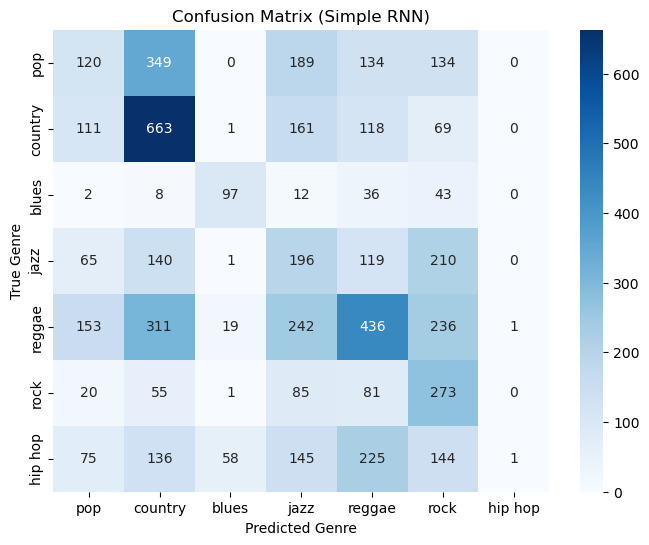

In [70]:
labels = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix (Simple RNN)")
plt.show()

LSTM RNN:

In [77]:
# Split data for LSTM model
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_lstm = label_binarizer.fit_transform(y_train_lstm)
y_test_lstm = label_binarizer.transform(y_test_lstm)

In [78]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  LSTM(32),
  Dense(7)
])

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model.fit(
    X_train_lstm,
    y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=15,
    callbacks= [callback])

Epoch 1/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.2374 - loss: 0.4258 - val_accuracy: 0.2546 - val_loss: 0.3883
Epoch 2/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.2528 - loss: 0.3837 - val_accuracy: 0.2962 - val_loss: 0.3754
Epoch 3/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.3075 - loss: 0.3672 - val_accuracy: 0.3394 - val_loss: 0.3656
Epoch 4/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.3686 - loss: 0.3468 - val_accuracy: 0.3233 - val_loss: 0.3640
Epoch 5/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.4219 - loss: 0.3301 - val_accuracy: 0.3457 - val_loss: 0.3585
Epoch 6/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.4707 - loss: 0.3113 - val_accuracy: 0.3468 - val_loss: 0.3630


In [81]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 499,511 (1.91 MB)

 Trainable params: 166,503 (650.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 333,008 (1.27 MB)

178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


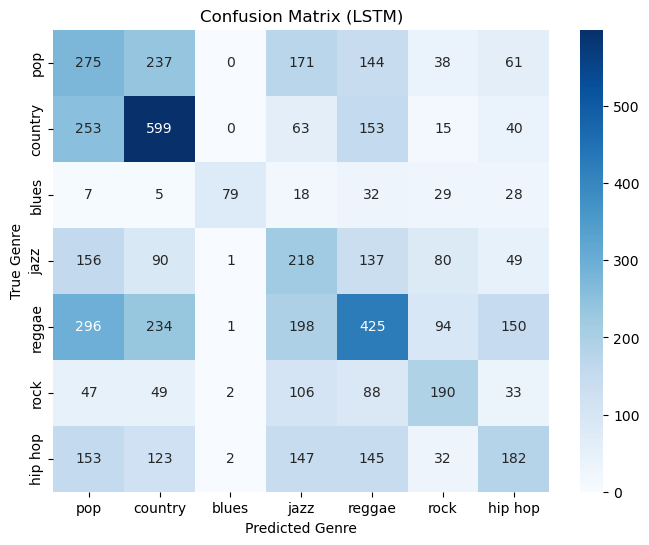

In [82]:
labels = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

predictions_lstm = model.predict(X_test)
predicted_labels_lstm = np.argmax(predictions_lstm, axis=1)

true_labels_lstm = np.argmax(y_test, axis=1)

conf_matrix_lstm = confusion_matrix(true_labels_lstm, predicted_labels_lstm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix (LSTM)")
plt.show()

Bidirectional:

In [60]:
# Split data for Bidirectional model
X_train_bidir, X_test_bidir, y_train_bidir, y_test_bidir = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_bidir = label_binarizer.fit_transform(y_train_bidir)
y_test_bidir = label_binarizer.transform(y_test_bidir)

In [61]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  Bidirectional(LSTM(32, return_sequences=True), input_shape=(5,7)),
  Bidirectional(LSTM(16)),
  Dense(7)
])

/Users/habibasalman/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model.fit(
    X_train_bidir,
    y_train_bidir,
    validation_data=(X_test_bidir, y_test_bidir),
    epochs=15,
    callbacks= [callback])

Epoch 1/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - accuracy: 0.2283 - loss: 0.4209 - val_accuracy: 0.2472 - val_loss: 0.3871
Epoch 2/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.2622 - loss: 0.3820 - val_accuracy: 0.2996 - val_loss: 0.3706
Epoch 3/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.3565 - loss: 0.3544 - val_accuracy: 0.3422 - val_loss: 0.3613
Epoch 4/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.4440 - loss: 0.3267 - val_accuracy: 0.3755 - val_loss: 0.3570
Epoch 5/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.5184 - loss: 0.3003 - val_accuracy: 0.3729 - val_loss: 0.3624


In [64]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 100, 64)        │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549,431 (2.10 MB)

 Trainable params: 183,143 (715.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 366,288 (1.40 MB)

178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


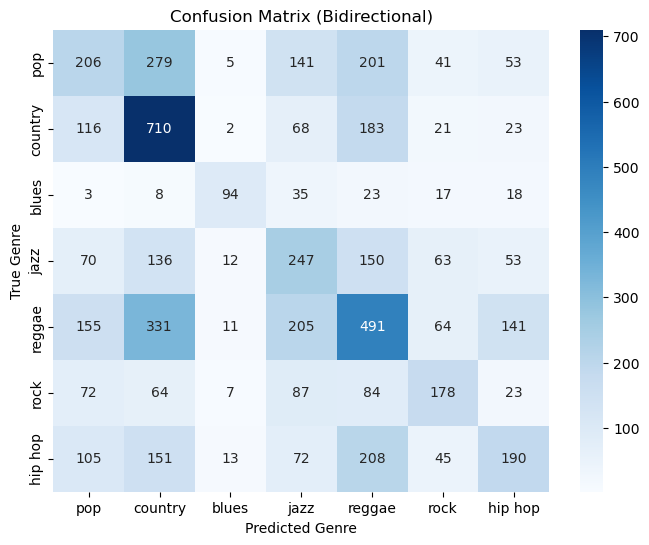

In [65]:
labels = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

predictions_lstm = model.predict(X_test)
predicted_labels_lstm = np.argmax(predictions_lstm, axis=1)

true_labels_lstm = np.argmax(y_test, axis=1)

conf_matrix_lstm = confusion_matrix(true_labels_lstm, predicted_labels_lstm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix (Bidirectional)")
plt.show()

Test with different params:

In [71]:
# Split data for Various Layers
X_train_various, X_test_various, y_train_various, y_test_various = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_various = label_binarizer.fit_transform(y_train_various)
y_test_various = label_binarizer.transform(y_test_various)

In [72]:
embedding_dim=100

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  Bidirectional(LSTM(128, return_sequences=True)),
  Dropout(.5),
  Bidirectional(LSTM(64)),
  BatchNormalization(),
  Dense(64, activation="relu"),
  Dropout(.5),
  Dense(7, activation="softmax")
])

In [73]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [74]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop after 3 epochs if no improvement
    restore_best_weights=True
)

model.fit(
    X_train_various,
    y_train_various,
    validation_data=(X_test_various, y_test_various),
    epochs=50,
    callbacks= [callback])

Epoch 1/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 151s 204ms/step - accuracy: 0.2434 - loss: 1.8329 - val_accuracy: 0.3193 - val_loss: 1.6966
Epoch 2/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 144s 203ms/step - accuracy: 0.3885 - loss: 1.5780 - val_accuracy: 0.3563 - val_loss: 1.7631
Epoch 3/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 148s 209ms/step - accuracy: 0.4922 - loss: 1.3650 - val_accuracy: 0.3501 - val_loss: 1.7225
Epoch 4/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 159s 224ms/step - accuracy: 0.5630 - loss: 1.1891 - val_accuracy: 0.3471 - val_loss: 1.8116


In [75]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 100, 256)       │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,223,703 (16.11 MB)

 Trainable params: 1,407,815 (5.37 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 2,815,632 (10.74 MB)

178/178 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step


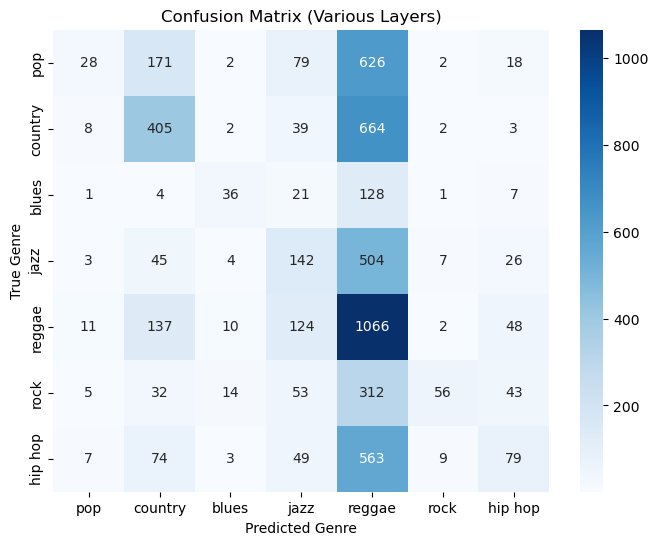

In [76]:
labels = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

predictions_lstm = model.predict(X_test)
predicted_labels_lstm = np.argmax(predictions_lstm, axis=1)

true_labels_lstm = np.argmax(y_test, axis=1)

conf_matrix_lstm = confusion_matrix(true_labels_lstm, predicted_labels_lstm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix (Various Layers)")
plt.show()

Do hyperparameter optimization

In [15]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential([
        vectorize_layer,
        Embedding(vocab_size, hp.Int('embedding_dim', min_value=32, max_value=256, step=32), name="embedding"),
        Bidirectional(LSTM(hp.Int('units_1', min_value=32, max_value=256, step=32), return_sequences=True)),
        Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        Bidirectional(LSTM(hp.Int('units_2', min_value=32, max_value=256, step=32))),
        BatchNormalization(),
        Dense(hp.Int('units_3', min_value=32, max_value=256, step=32), activation="relu"),
        Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(7, activation="softmax")
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [16]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop after 3 epochs if no improvement
    restore_best_weights=True
)

# Define tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='text_classification')

# Start the search for the best hyperparameter configuration
tuner.search(X_train, y_train,
             validation_data=(X_test, y_test),
             epochs=50,
             callbacks=[callback])

# Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from my_dir/text_classification/tuner0.json


In [17]:
# print(best_hps.values)

Run with new hyperparameters:
{'embedding_dim': 224, 'units_1': 32, 'dropout_1': 0.2, 'units_2': 64, 'units_3': 224, 'dropout_2': 0.2}

In [18]:
embedding_dim=224

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  Bidirectional(LSTM(32, return_sequences=True)),
  Dropout(.2),
  Bidirectional(LSTM(64)),
  BatchNormalization(),
  Dense(224, activation="relu"),
  Dropout(.2),
  Dense(7, activation="softmax")
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [20]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop after 3 epochs if no improvement
    restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks= [callback])

Epoch 1/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.2720 - loss: 1.7720 - val_accuracy: 0.3493 - val_loss: 1.6259
Epoch 2/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 62s 87ms/step - accuracy: 0.4589 - loss: 1.4165 - val_accuracy: 0.3591 - val_loss: 1.6770
Epoch 3/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 64s 90ms/step - accuracy: 0.5768 - loss: 1.1339 - val_accuracy: 0.3656 - val_loss: 1.8232
Epoch 4/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 64s 90ms/step - accuracy: 0.6911 - loss: 0.8608 - val_accuracy: 0.3501 - val_loss: 2.0984


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 224)       │     2,240,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 64)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 224)            │        28,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,575 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,207,959 (27.50 MB)

 Trainable params: 2,402,567 (9.17 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 4,805,136 (18.33 MB)

178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


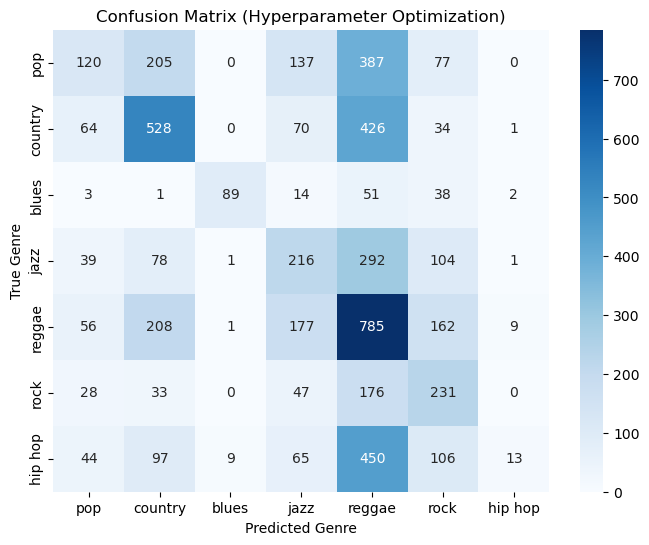

In [23]:
labels = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

predictions_HO = model.predict(X_test)
predicted_labels_HO = np.argmax(predictions_HO, axis=1)

true_labels_HO = np.argmax(y_test, axis=1)

conf_matrix_HO = confusion_matrix(true_labels_HO, predicted_labels_HO)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_HO, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix (Hyperparameter Optimization)")
plt.show()